In [1]:
from pinkylib import Camera

In [2]:
cam = Camera()

[0:52:49.382208193] [4035]  INFO Camera camera_manager.cpp:313 libcamera v0.3.0+65-6ddd79b5
[0:52:49.389885794] [4114]  INFO RPI pisp.cpp:695 libpisp version v1.0.6 b567f0455680 17-06-2024 (10:20:00)
[0:52:49.399141297] [4114]  INFO RPI pisp.cpp:1154 Registered camera /base/axi/pcie@120000/rp1/i2c@88000/ov5647@36 to CFE device /dev/media1 and ISP device /dev/media2 using PiSP variant BCM2712_C0
[0:52:49.400583718] [4035]  INFO Camera camera_manager.cpp:313 libcamera v0.3.0+65-6ddd79b5
[0:52:49.408469356] [4117]  INFO RPI pisp.cpp:695 libpisp version v1.0.6 b567f0455680 17-06-2024 (10:20:00)
[0:52:49.417935710] [4117]  INFO RPI pisp.cpp:1154 Registered camera /base/axi/pcie@120000/rp1/i2c@88000/ov5647@36 to CFE device /dev/media1 and ISP device /dev/media2 using PiSP variant BCM2712_C0


In [3]:
cam.set_calibration() #카메라 캘리브레이션 설정

In [4]:
cam.start()

[0:52:53.129753031] [4035]  WARN V4L2 v4l2_pixelformat.cpp:344 Unsupported V4L2 pixel format RPBP
[0:52:53.130734509] [4035]  INFO Camera camera.cpp:1183 configuring streams: (0) 640x480-RGB888 (1) 640x480-GBRG_PISP_COMP1
[0:52:53.130891694] [4117]  INFO RPI pisp.cpp:1450 Sensor: /base/axi/pcie@120000/rp1/i2c@88000/ov5647@36 - Selected sensor format: 640x480-SGBRG10_1X10 - Selected CFE format: 640x480-PC1g


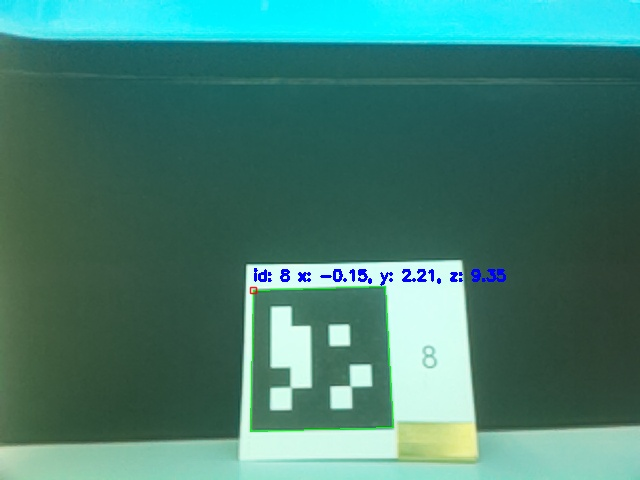

x:  -0.1489433108288511 y:  2.214291212243252 z:  9.352377778771693


In [16]:
frame = cam.get_frame()
pose = cam.detect_aruco(frame)
print("x: ", str(pose[0]), "y: ", str(pose[1]), "z: ", str(pose[2]))

In [6]:
cam.close()

In [1]:
from ultralytics import YOLO
from pinkylib import Camera

import time

In [2]:
model = YOLO('best (1).pt')

In [3]:
cam = Camera()
cam.start()

[0:21:47.956096316] [3235]  INFO Camera camera_manager.cpp:313 libcamera v0.3.0+65-6ddd79b5
[0:21:47.964036015] [3259]  INFO RPI pisp.cpp:695 libpisp version v1.0.6 b567f0455680 17-06-2024 (10:20:00)
[0:21:47.973462243] [3259]  INFO RPI pisp.cpp:1154 Registered camera /base/axi/pcie@120000/rp1/i2c@88000/ov5647@36 to CFE device /dev/media1 and ISP device /dev/media2 using PiSP variant BCM2712_C0
[0:21:47.975191216] [3235]  INFO Camera camera_manager.cpp:313 libcamera v0.3.0+65-6ddd79b5
[0:21:47.982862268] [3262]  INFO RPI pisp.cpp:695 libpisp version v1.0.6 b567f0455680 17-06-2024 (10:20:00)
[0:21:47.992615588] [3262]  INFO RPI pisp.cpp:1154 Registered camera /base/axi/pcie@120000/rp1/i2c@88000/ov5647@36 to CFE device /dev/media1 and ISP device /dev/media2 using PiSP variant BCM2712_C0
[0:21:47.995717516] [3235]  WARN V4L2 v4l2_pixelformat.cpp:344 Unsupported V4L2 pixel format RPBP
[0:21:47.996460345] [3235]  INFO Camera camera.cpp:1183 configuring streams: (0) 640x480-RGB888 (1) 640x48

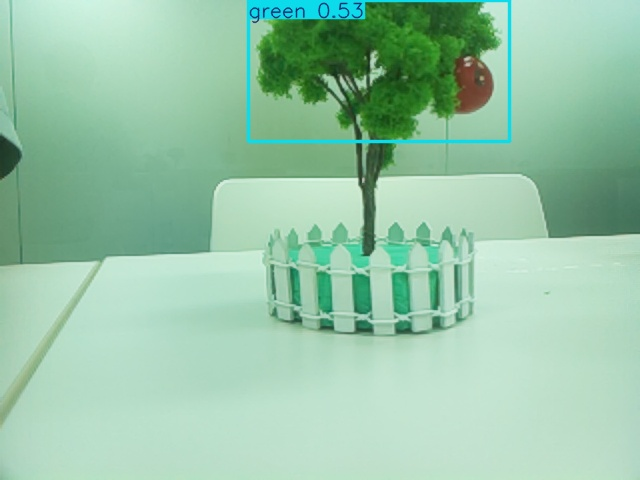

KeyboardInterrupt: 

In [4]:
while True:
    frame = cam.get_frame()
    results = model(frame)

    result_frame = results[0].plot()
    cam.display_jupyter(result_frame)
    time.sleep(0.1)